In [1]:
from rikai.spark.utils import init_spark_session
from rikai.spark.functions import init

spark = init_spark_session()
init(spark)

:: loading settings :: url = jar:file:/Users/da/.pyenv/versions/3.8.10/envs/rikai-ocr/lib/python3.8/site-packages/pyspark/jars/ivy-2.4.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /Users/da/.ivy2/cache
The jars for the packages stored in: /Users/da/.ivy2/jars
ai.eto#rikai_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-9d0bef13-34f5-429f-98df-0534d3905d45;1.0
	confs: [default]
	found ai.eto#rikai_2.12;0.1.12 in central
	found org.xerial.snappy#snappy-java;1.1.8.4 in central
	found com.typesafe.scala-logging#scala-logging_2.12;3.9.4 in central
	found org.slf4j#slf4j-api;1.7.30 in spark-list
	found org.mlflow#mlflow-client;1.21.0 in central
	found org.apache.logging.log4j#log4j-core;2.17.1 in central
:: resolution report :: resolve 219ms :: artifacts dl 5ms
	:: modules in use:
	ai.eto#rikai_2.12;0.1.12 from central in [default]
	com.typesafe.scala-logging#scala-logging_2.12;3.9.4 from central in [default]
	org.apache.logging.log4j#log4j-core;2.17.1 from central in [default]
	org.mlflow#mlflow-client;1.21.0 from central in [default]
	org.slf4j#slf4j-api;1.7.30 from spark-list in [default]
	org.x

In [2]:
spark.sql("create or replace model keras_ocr flavor dummy model_type rikai.contrib.ocr.keras")

DataFrame[]

In [3]:
image_uri = 'https://www.rochester.edu/newscenter/wp-content/uploads/2022/03/fea-ukraine-russian-war.jpg'
df = spark.sql(f"""
select pred.text, pred.mask
from (
  select explode(ML_PREDICT(keras_ocr, to_image('{image_uri}'))) as pred
)
""").toPandas()

Looking for /Users/da/.keras-ocr/craft_mlt_25k.h5                   (0 + 1) / 1]
2022-07-06 17:08:51.458734: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Looking for /Users/da/.keras-ocr/crnn_kurapan.h5
Looking for /Users/da/.keras-ocr/craft_mlt_25k.h5
2022-07-06 17:09:07.662361: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Looking for /Users/da/.keras-ocr/crnn_kurapan.h5


In [4]:
df

,text,mask
0,stop,"Mask(type=Type.POLYGON, data=...)"
1,war,"Mask(type=Type.POLYGON, data=...)"
2,lel,"Mask(type=Type.POLYGON, data=...)"


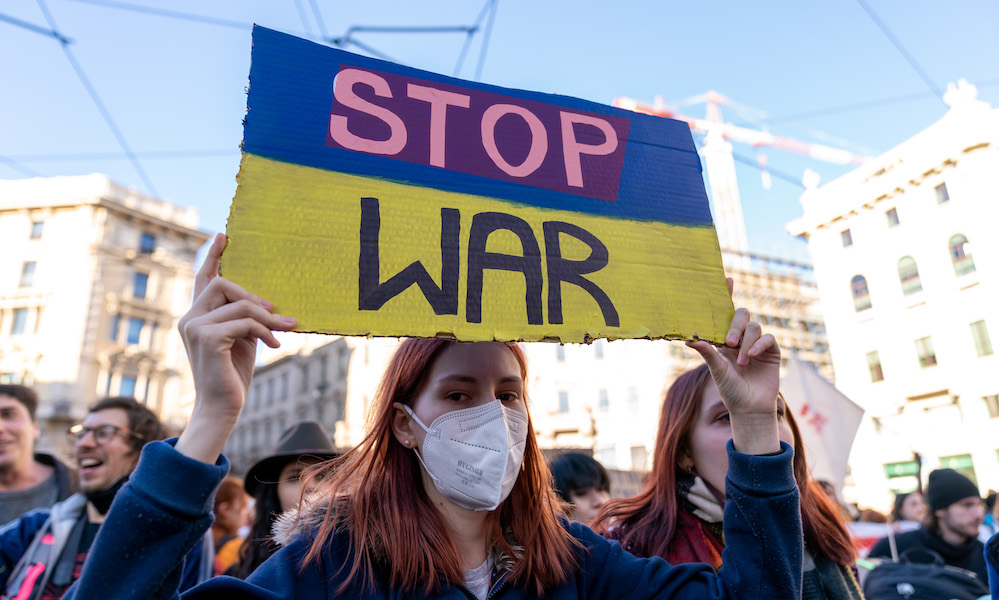

In [5]:
from rikai.types.vision import Image
image_ocr_stop = Image(image_uri) | df['mask'][0]
image_ocr_stop.to_image().to_pil()